In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
df=df.drop("longitude" ,axis=1)
df=df.drop("latitude" ,axis=1)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
import numpy as np
Y=df["median_house_value"]
Y=np.array(Y)
Y.shape

(17000,)

In [5]:
m=Y.shape[0]
m

17000

In [6]:
temp_X=df.drop("median_house_value",axis=1)
temp_X["X0"]=np.random.randint(1,2,m)
X=np.array(temp_X.T)
X.shape
X

array([[1.5000e+01, 1.9000e+01, 1.7000e+01, ..., 1.7000e+01, 1.9000e+01,
        5.2000e+01],
       [5.6120e+03, 7.6500e+03, 7.2000e+02, ..., 2.6770e+03, 2.6720e+03,
        1.8200e+03],
       [1.2830e+03, 1.9010e+03, 1.7400e+02, ..., 5.3100e+02, 5.5200e+02,
        3.0000e+02],
       ...,
       [4.7200e+02, 4.6300e+02, 1.1700e+02, ..., 4.5600e+02, 4.7800e+02,
        2.7000e+02],
       [1.4936e+00, 1.8200e+00, 1.6509e+00, ..., 3.0313e+00, 1.9797e+00,
        3.0147e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [7]:
theta=[]
for i in range(X.shape[0]):
    theta.append(0)
theta=np.array(theta)
theta.shape

(7,)

In [8]:
def sqcost(theta):
    hypo=theta .dot(X)
    costvalue=0
    for i in (hypo-Y):
        costvalue+=i*i
    return costvalue/(2*m)

In [9]:
def deltheta(theta):
    hypo=theta.dot(X)
    delthetaar=[]
    for j in range(0,X.shape[0]):
        cost=0
        for i in range(m):
            cost+=(hypo-Y)[i]*X[j,i]
        delthetaar.append((cost)/m)
    delthetaar=np.array(delthetaar)
    return delthetaar

In [10]:
alpha=0.0000001

In [11]:
itrar=[]
sqcostar=[]
for k in range(100):
    deltheta(theta)
    theta=theta-alpha*deltheta(theta)
    itrar.append(k)
    sqcostar.append(sqcost(theta))

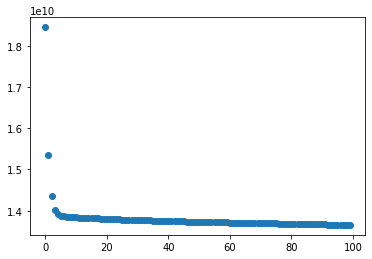

In [12]:
plt.scatter(itrar,sqcostar)
plt.show()